

# Week 1: Multiple Output Models using the Keras Functional API

Welcome to the first programming assignment of the course! Your task will be to use the Keras functional API to train a model to predict two outputs. For this lab, you will use the **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository**. It has separate datasets for red wine and white wine.

Normally, the wines are classified into one of the quality ratings specified in the attributes. In this exercise, you will combine the two datasets to predict the wine quality and whether the wine is red or white solely from the attributes. 

You will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.

#### Please complete sections that are marked **(TODO)**

## Imports

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import utils

## Load Dataset


You will now download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

### Pre-process the white wine dataset (TODO)
You will add a new column named `is_red` in your dataframe to indicate if the wine is white or red. 
- In the white wine dataset, you will fill the column `is_red` with  zeros (0).

In [4]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

print(type(white_df),np.shape(white_df))
print(white_df.keys())
#white_df['is_red']=None

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')


<class 'pandas.core.frame.DataFrame'> (4898, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
# You can click `File -> Open` in the menu above and open the `utils.py` file 
# in case you want to inspect the unit tests being used for each graded function.

utils.test_white_df(white_df)


 All public tests passed


In [6]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

# EXPECTED OUTPUT
# 8.8
# 9.1

8.8
9.1


### Pre-process the red wine dataset (TODO)
- In the red wine dataset, you will fill in the column `is_red` with ones (1).

In [7]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')


In [10]:
utils.test_red_df(red_df)


 All public tests passed


In [11]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.2

9.4
10.2


### Concatenate the datasets

Next, concatenate the red and white wine dataframes.

In [12]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [13]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 9.5

9.4
9.5


In [14]:
# NOTE: In a real-world scenario, you should shuffle the data.
# YOU ARE NOT going to do that here because we want to test
# with deterministic data. But if you want the code to do it,
# it's in the commented line below:

#df = df.iloc[np.random.permutation(len(df))]

This will chart the quality of the wines.

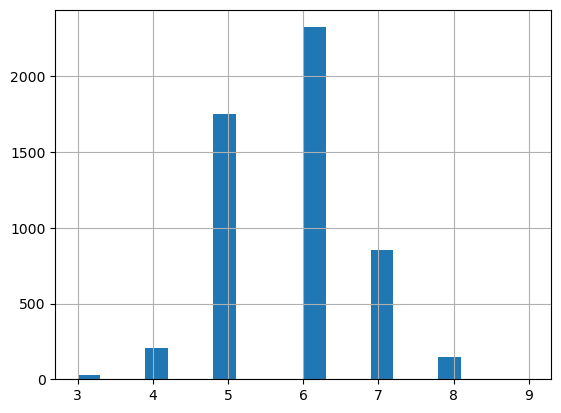

In [43]:
df['quality'].hist(bins=20);

### Imbalanced data (TODO)
You can see from the plot above that the wine quality dataset is imbalanced. 
- Since there are very few observations with quality equal to 3, 4, 8 and 9, you can drop these observations from your dataset. 
- You can do this by removing data belonging to all classes except those > 4 and < 8.

In [15]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [16]:
utils.test_df_drop(df)



 All public tests passed


In [17]:
print(df.alcohol[0])
print(df.alcohol[100])

# EXPECTED OUTPUT
# 9.4
# 10.9

9.4
10.9


You can plot again to see the new range of data and quality

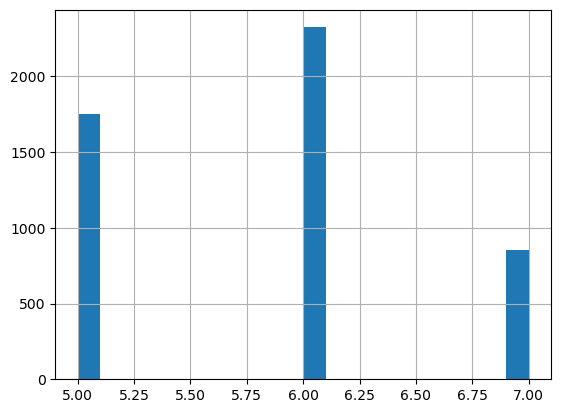

In [23]:
df['quality'].hist(bins=20);

### Train Test Split (TODO)

Next, you can split the datasets into training, test and validation datasets.
- The data frame should be split 80:20 into `train` and `test` sets.
- The resulting `train` should then be split 80:20 into `train` and `val` sets.
- The `train_test_split` parameter `test_size` takes a float value that ranges between 0. and 1, and represents the proportion of the dataset that is allocated to the test set.  The rest of the data is allocated to the training set.

In [18]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# Please do not change the random_state parameter. This is needed for grading.

# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [19]:
utils.test_data_sizes(train.size, test.size, val.size)



 All public tests passed


Here's where you can explore the training stats. You can pop the labels 'is_red' and 'quality' from the data as these will be used as the labels


In [20]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

Explore the training stats!

In [21]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


### Get the labels (TODO)

The features and labels are currently in the same dataframe.
- You will want to store the label columns `is_red` and `quality` separately from the feature columns.  
- The following function, `format_output`, gets these two columns from the dataframe (it's given to you).
- `format_output` also formats the data into numpy arrays. 
- Please use the `format_output` and apply it to the `train`, `val` and `test` sets to get dataframes for the labels.

In [22]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [23]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [24]:
utils.test_format_output(df, train_Y, val_Y, test_Y)

 All public tests passed


Notice that after you get the labels, the `train`, `val` and `test` dataframes no longer contain the label columns, and contain just the feature columns.
- This is because you used `.pop` in the `format_output` function.

In [20]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


### Normalize the data (TODO)

Next, you can normalize the data, x, using the formula:
$$x_{norm} = \frac{x - \mu}{\sigma}$$
- The `norm` function is defined for you.
- Please apply the `norm` function to normalize the dataframes that contains the feature columns of `train`, `val` and `test` sets.

In [25]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [26]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [98]:
utils.test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)


 All public tests passed


## Define the Model (TODO)

Define the model using the functional API. The base model will be 2 `Dense` layers of 128 neurons each, and have the `'relu'` activation.
- Check out the documentation for [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [42]:
def base_model(inputs):
 
    # connect a Dense layer with 128 neurons and a relu activation
    # connect another Dense layer with 128 neurons and a relu activation

    x = tf.keras.layers.Dense(128,activation='relu')(inputs)
    x = tf.keras.layers.Dense(128,activation='relu')(x)

    
    return x

In [43]:
utils.test_base_model(base_model)

return_type_check: Return type is incorrect. Please check implementation.
Expected: <class 'tensorflow.python.framework.ops.Tensor'>
Result: <class 'keras.engine.keras_tensor.KerasTensor'>
Please open utils.py if you want to see the unit test here.

 5  Tests passed
 1  Tests failed


Exception: Output layer type is incorrect. Please check implementation.

# Define output layers of the model (TODO)

You will add output layers to the base model. 
- The model will need two outputs.

One output layer will predict wine quality, which is a numeric value.
- Define a `Dense` layer with 1 neuron.
- Since this is a regression output, the activation can be left as its default value `None`.

The other output layer will predict the wine type, which is either red `1` or not red `0` (white).
- Define a `Dense` layer with 1 neuron.
- Since there are two possible categories, you can use a sigmoid activation for binary classification.

Define the `Model`
- Define the `Model` object, and set the following parameters:
  - `inputs`: pass in the inputs to the model as a list.
  - `outputs`: pass in a list of the outputs that you just defined: wine quality, then wine type.
  - **Note**: please list the wine quality before wine type in the outputs, as this will affect the calculated loss if you choose the other order.

In [44]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality', activation=None)(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    return model

In [45]:
utils.test_final_model(final_model)

return_type_check: Return type is incorrect. Please check implementation.
Expected: <class 'keras.engine.training.Model'>
Result: <class 'keras.engine.functional.Functional'>
Please open utils.py if you want to see the unit test here.

 1  Tests passed
 1  Tests failed


Exception: wine_quality layer has an incorrect activation. Please check implementation.

## Compiling the Model

Next, compile the model. When setting the loss parameter of `model.compile`, you're setting the loss for each of the two outputs (wine quality and wine type).

To set more than one loss, use a dictionary of key-value pairs.
- You can look at the docs for the losses [here](https://www.tensorflow.org/api_docs/python/tf/keras/losses#functions).
    - **Note**: For the desired spelling, please look at the "Functions" section of the documentation and not the "classes" section on that same page.
- wine_type: Since you will be performing binary classification on wine type, you should use the binary crossentropy loss function for it.  Please pass this in as a string.  
  - **Hint**, this should be all lowercase.  In the documentation, you'll see this under the "Functions" section, not the "Classes" section.
- wine_quality: since this is a regression output, use the mean squared error.  Please pass it in as a string, all lowercase.
  - **Hint**: You may notice that there are two aliases for mean squared error.  Please use the shorter name.


You will also set the metric for each of the two outputs.  Again, to set metrics for two or more outputs, use a dictionary with key value pairs.
- The metrics documentation is linked [here](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).
- For the wine type, please set it to accuracy as a string, all lowercase.
- For wine quality, please use the root mean squared error.  Instead of a string, you'll set it to an instance of the class [RootMeanSquaredError](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError), which belongs to the tf.keras.metrics module.

**Note**: If you see the error message 
>Exception: wine quality loss function is incorrect.

- Please also check your other losses and metrics, as the error may be caused by the other three key-value pairs and not the wine quality loss.

In [49]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

model.predict(norm_train_X)


[array([[-0.11635119],
        [-0.18928865],
        [-0.13417056],
        ...,
        [ 0.03467327],
        [-0.07414717],
        [-0.12160444]], dtype=float32),
 array([[0.6438722 ],
        [0.5963608 ],
        [0.6220446 ],
        ...,
        [0.7123827 ],
        [0.61167645],
        [0.53522205]], dtype=float32)]

In [47]:
utils.test_model_compile(model)

IndexError: list index out of range

## Training the Model

Fit the model to the training inputs and outputs. 
- Check the documentation for [model.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit).
- Remember to use the normalized training set as inputs. 
- For the validation data, please use the normalized validation set.

In [50]:
## Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
## You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



history = model.fit(norm_train_X, train_Y,
                    epochs = 180, validation_data=(norm_val_X, val_Y))

Epoch 1/180
99/99 [==============================] - 1s 7ms/step - loss: 25.6944 - wine_quality_loss: 24.8364 - wine_type_loss: 0.8581 - wine_quality_root_mean_squared_error: 4.9836 - wine_type_accuracy: 0.2567 - val_loss: 17.5921 - val_wine_quality_loss: 16.7252 - val_wine_type_loss: 0.8669 - val_wine_quality_root_mean_squared_error: 4.0896 - val_wine_type_accuracy: 0.2662
Epoch 2/180
99/99 [==============================] - 0s 5ms/step - loss: 11.5709 - wine_quality_loss: 10.6903 - wine_type_loss: 0.8806 - wine_quality_root_mean_squared_error: 3.2696 - wine_type_accuracy: 0.2564 - val_loss: 6.6111 - val_wine_quality_loss: 5.7549 - val_wine_type_loss: 0.8562 - val_wine_quality_root_mean_squared_error: 2.3989 - val_wine_type_accuracy: 0.2687
Epoch 3/180
99/99 [==============================] - 0s 5ms/step - loss: 4.5890 - wine_quality_loss: 3.8030 - wine_type_loss: 0.7860 - wine_quality_root_mean_squared_error: 1.9501 - wine_type_accuracy: 0.3182 - val_loss: 3.1154 - val_wine_quality_l

Epoch 23/180
99/99 [==============================] - 0s 5ms/step - loss: 0.6329 - wine_quality_loss: 0.5938 - wine_type_loss: 0.0391 - wine_quality_root_mean_squared_error: 0.7706 - wine_type_accuracy: 0.9927 - val_loss: 0.6037 - val_wine_quality_loss: 0.5659 - val_wine_type_loss: 0.0378 - val_wine_quality_root_mean_squared_error: 0.7523 - val_wine_type_accuracy: 0.9937
Epoch 24/180
99/99 [==============================] - 0s 5ms/step - loss: 0.6041 - wine_quality_loss: 0.5661 - wine_type_loss: 0.0380 - wine_quality_root_mean_squared_error: 0.7524 - wine_type_accuracy: 0.9930 - val_loss: 0.5750 - val_wine_quality_loss: 0.5380 - val_wine_type_loss: 0.0370 - val_wine_quality_root_mean_squared_error: 0.7335 - val_wine_type_accuracy: 0.9949
Epoch 25/180
99/99 [==============================] - 1s 5ms/step - loss: 0.5789 - wine_quality_loss: 0.5419 - wine_type_loss: 0.0370 - wine_quality_root_mean_squared_error: 0.7361 - wine_type_accuracy: 0.9937 - val_loss: 0.5522 - val_wine_quality_loss

Epoch 45/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3694 - wine_quality_loss: 0.3405 - wine_type_loss: 0.0288 - wine_quality_root_mean_squared_error: 0.5836 - wine_type_accuracy: 0.9946 - val_loss: 0.3668 - val_wine_quality_loss: 0.3359 - val_wine_type_loss: 0.0309 - val_wine_quality_root_mean_squared_error: 0.5796 - val_wine_type_accuracy: 0.9949
Epoch 46/180
99/99 [==============================] - 1s 5ms/step - loss: 0.3644 - wine_quality_loss: 0.3358 - wine_type_loss: 0.0286 - wine_quality_root_mean_squared_error: 0.5795 - wine_type_accuracy: 0.9946 - val_loss: 0.3667 - val_wine_quality_loss: 0.3358 - val_wine_type_loss: 0.0309 - val_wine_quality_root_mean_squared_error: 0.5795 - val_wine_type_accuracy: 0.9949
Epoch 47/180
99/99 [==============================] - 0s 4ms/step - loss: 0.3638 - wine_quality_loss: 0.3355 - wine_type_loss: 0.0283 - wine_quality_root_mean_squared_error: 0.5792 - wine_type_accuracy: 0.9946 - val_loss: 0.3616 - val_wine_quality_loss

Epoch 67/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3274 - wine_quality_loss: 0.3024 - wine_type_loss: 0.0250 - wine_quality_root_mean_squared_error: 0.5499 - wine_type_accuracy: 0.9949 - val_loss: 0.3453 - val_wine_quality_loss: 0.3160 - val_wine_type_loss: 0.0293 - val_wine_quality_root_mean_squared_error: 0.5621 - val_wine_type_accuracy: 0.9949
Epoch 68/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3270 - wine_quality_loss: 0.3022 - wine_type_loss: 0.0248 - wine_quality_root_mean_squared_error: 0.5497 - wine_type_accuracy: 0.9949 - val_loss: 0.3460 - val_wine_quality_loss: 0.3168 - val_wine_type_loss: 0.0292 - val_wine_quality_root_mean_squared_error: 0.5629 - val_wine_type_accuracy: 0.9949
Epoch 69/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3242 - wine_quality_loss: 0.2995 - wine_type_loss: 0.0247 - wine_quality_root_mean_squared_error: 0.5473 - wine_type_accuracy: 0.9949 - val_loss: 0.3533 - val_wine_quality_loss

Epoch 89/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3089 - wine_quality_loss: 0.2864 - wine_type_loss: 0.0224 - wine_quality_root_mean_squared_error: 0.5352 - wine_type_accuracy: 0.9962 - val_loss: 0.3463 - val_wine_quality_loss: 0.3178 - val_wine_type_loss: 0.0285 - val_wine_quality_root_mean_squared_error: 0.5637 - val_wine_type_accuracy: 0.9949
Epoch 90/180
99/99 [==============================] - 1s 5ms/step - loss: 0.3093 - wine_quality_loss: 0.2869 - wine_type_loss: 0.0224 - wine_quality_root_mean_squared_error: 0.5356 - wine_type_accuracy: 0.9959 - val_loss: 0.3427 - val_wine_quality_loss: 0.3143 - val_wine_type_loss: 0.0284 - val_wine_quality_root_mean_squared_error: 0.5606 - val_wine_type_accuracy: 0.9949
Epoch 91/180
99/99 [==============================] - 0s 5ms/step - loss: 0.3080 - wine_quality_loss: 0.2857 - wine_type_loss: 0.0223 - wine_quality_root_mean_squared_error: 0.5345 - wine_type_accuracy: 0.9959 - val_loss: 0.3427 - val_wine_quality_loss

Epoch 111/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2972 - wine_quality_loss: 0.2767 - wine_type_loss: 0.0205 - wine_quality_root_mean_squared_error: 0.5260 - wine_type_accuracy: 0.9959 - val_loss: 0.3396 - val_wine_quality_loss: 0.3119 - val_wine_type_loss: 0.0277 - val_wine_quality_root_mean_squared_error: 0.5585 - val_wine_type_accuracy: 0.9949
Epoch 112/180
99/99 [==============================] - 0s 4ms/step - loss: 0.2969 - wine_quality_loss: 0.2765 - wine_type_loss: 0.0204 - wine_quality_root_mean_squared_error: 0.5258 - wine_type_accuracy: 0.9965 - val_loss: 0.3370 - val_wine_quality_loss: 0.3094 - val_wine_type_loss: 0.0276 - val_wine_quality_root_mean_squared_error: 0.5563 - val_wine_type_accuracy: 0.9949
Epoch 113/180
99/99 [==============================] - 0s 4ms/step - loss: 0.2962 - wine_quality_loss: 0.2759 - wine_type_loss: 0.0203 - wine_quality_root_mean_squared_error: 0.5252 - wine_type_accuracy: 0.9965 - val_loss: 0.3437 - val_wine_quality_l

Epoch 133/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2874 - wine_quality_loss: 0.2685 - wine_type_loss: 0.0189 - wine_quality_root_mean_squared_error: 0.5182 - wine_type_accuracy: 0.9968 - val_loss: 0.3374 - val_wine_quality_loss: 0.3101 - val_wine_type_loss: 0.0273 - val_wine_quality_root_mean_squared_error: 0.5568 - val_wine_type_accuracy: 0.9949
Epoch 134/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2867 - wine_quality_loss: 0.2679 - wine_type_loss: 0.0188 - wine_quality_root_mean_squared_error: 0.5176 - wine_type_accuracy: 0.9968 - val_loss: 0.3362 - val_wine_quality_loss: 0.3089 - val_wine_type_loss: 0.0273 - val_wine_quality_root_mean_squared_error: 0.5558 - val_wine_type_accuracy: 0.9949
Epoch 135/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2854 - wine_quality_loss: 0.2666 - wine_type_loss: 0.0188 - wine_quality_root_mean_squared_error: 0.5164 - wine_type_accuracy: 0.9965 - val_loss: 0.3384 - val_wine_quality_l

Epoch 155/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2777 - wine_quality_loss: 0.2601 - wine_type_loss: 0.0176 - wine_quality_root_mean_squared_error: 0.5100 - wine_type_accuracy: 0.9968 - val_loss: 0.3466 - val_wine_quality_loss: 0.3195 - val_wine_type_loss: 0.0271 - val_wine_quality_root_mean_squared_error: 0.5652 - val_wine_type_accuracy: 0.9949
Epoch 156/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2764 - wine_quality_loss: 0.2589 - wine_type_loss: 0.0175 - wine_quality_root_mean_squared_error: 0.5088 - wine_type_accuracy: 0.9968 - val_loss: 0.3400 - val_wine_quality_loss: 0.3129 - val_wine_type_loss: 0.0272 - val_wine_quality_root_mean_squared_error: 0.5593 - val_wine_type_accuracy: 0.9949
Epoch 157/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2759 - wine_quality_loss: 0.2585 - wine_type_loss: 0.0175 - wine_quality_root_mean_squared_error: 0.5084 - wine_type_accuracy: 0.9968 - val_loss: 0.3444 - val_wine_quality_l

Epoch 177/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2685 - wine_quality_loss: 0.2521 - wine_type_loss: 0.0164 - wine_quality_root_mean_squared_error: 0.5021 - wine_type_accuracy: 0.9968 - val_loss: 0.3398 - val_wine_quality_loss: 0.3126 - val_wine_type_loss: 0.0272 - val_wine_quality_root_mean_squared_error: 0.5591 - val_wine_type_accuracy: 0.9949
Epoch 178/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2678 - wine_quality_loss: 0.2514 - wine_type_loss: 0.0163 - wine_quality_root_mean_squared_error: 0.5014 - wine_type_accuracy: 0.9968 - val_loss: 0.3344 - val_wine_quality_loss: 0.3072 - val_wine_type_loss: 0.0272 - val_wine_quality_root_mean_squared_error: 0.5542 - val_wine_type_accuracy: 0.9949
Epoch 179/180
99/99 [==============================] - 0s 5ms/step - loss: 0.2671 - wine_quality_loss: 0.2508 - wine_type_loss: 0.0164 - wine_quality_root_mean_squared_error: 0.5008 - wine_type_accuracy: 0.9968 - val_loss: 0.3449 - val_wine_quality_l

In [51]:
utils.test_history(history)

KeyError: 'samples'

In [52]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

# EXPECTED VALUES
# ~ 0.30 - 0.38
# ~ 0.30 - 0.38
# ~ 0.018 - 0.030
# ~ 0.50 - 0.62
# ~ 0.97 - 1.0

# Example:
#0.3657050132751465
#0.3463745415210724
#0.019330406561493874
#0.5885359048843384
#0.9974651336669922

25/25 [==============================] - 0s 2ms/step - loss: 0.3407 - wine_quality_loss: 0.3135 - wine_type_loss: 0.0273 - wine_quality_root_mean_squared_error: 0.5599 - wine_type_accuracy: 0.9949

loss: 0.34073325991630554
wine_quality_loss: 0.31347423791885376
wine_type_loss: 0.027258988469839096
wine_quality_rmse: 0.559887707233429
wine_type_accuracy: 0.9949302673339844


## Analyze the Model Performance

Note that the model has two outputs. The output at index 0 is quality and index 1 is wine type

So, round the quality predictions to the nearest integer.

In [53]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [54]:
print(quality_pred[0])

# EXPECTED OUTPUT
# 5.6 - 6.0

[5.6522627]


In [55]:
print(type_pred[0])
print(type_pred[944])

# EXPECTED OUTPUT
# A number close to zero
# A number close to or equal to 1

[3.7745463e-05]
[0.9999958]


### Plot Utilities

We define a few utilities to visualize the model performance.

In [56]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [57]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [58]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

### Plots for Metrics

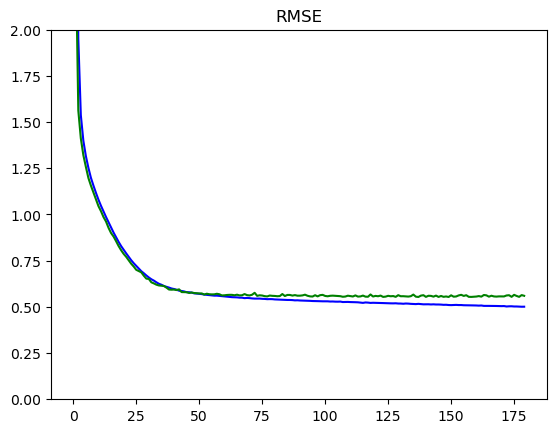

In [59]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

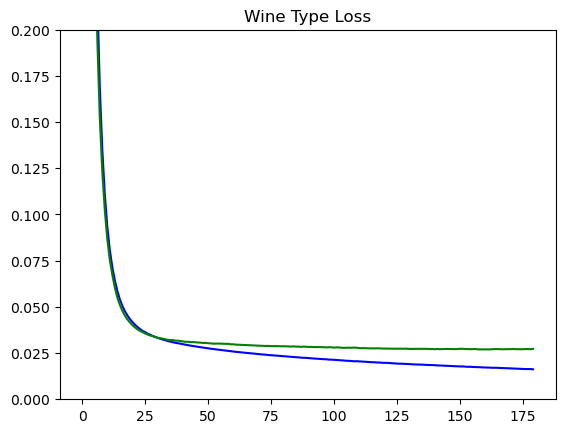

In [60]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

### Plots for Confusion Matrix

Plot the confusion matrices for wine type. You can see that the model performs well for prediction of wine type from the confusion matrix and the loss metrics.

C:\Users\Tom\AppData\Local\Temp\ipykernel_58020\1339240941.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Tom\AppData\Local\Temp\ipykernel_58020\1339240941.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


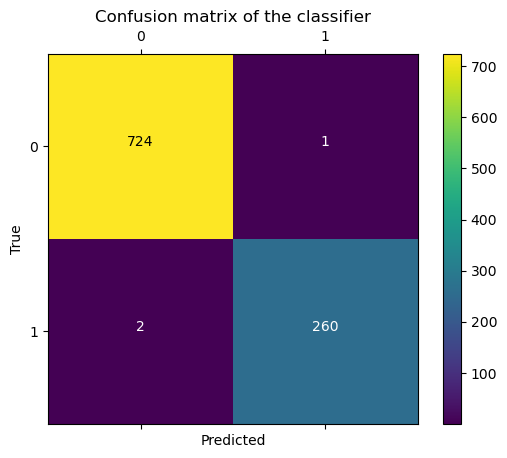

In [61]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

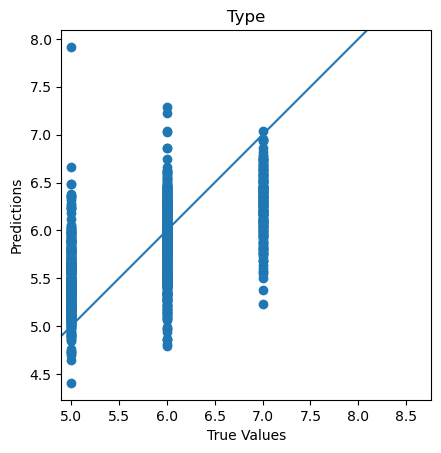

In [62]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')